In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
D = 60.0; #um^2/s
alpha = 1.4*1e-4; #um^2/s
R = 1.0; #um
K = 32.51/0.033; #unitless
vol_fraction = 0.1; #unitless
L = 100; #um
cinit = 1.0; #mol/um^3

nspace = 21; #Division in space
nkernel = 10; #Number of kernel expansions
timestep = 0.25; #s
decay_limit = 0.1; #Limite of kernel decay
maxwindow = 1000;


In [55]:
D

60.0

In [56]:
res = np.loadtxt("../data/result")
res_clean = np.loadtxt("../data/result_clean")

In [57]:
def make_time_space(res):
    t = np.arange(res.shape[0])*timestep + timestep;
    x = np.linspace(0, L, res.shape[1]);
    return t, x

In [58]:
t, x = make_time_space(res);
t_clean, x_clean = make_time_space(res_clean)

In [59]:
dx = L/(nspace - 1)

In [68]:
len(t)

100000

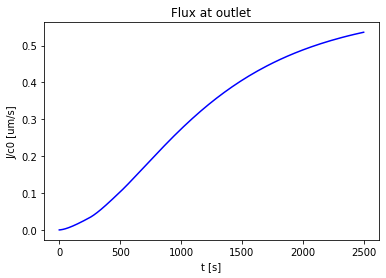

In [60]:
iscale = 10000
plt.plot(t[:iscale], D*res[:iscale, -2]/dx, color='blue')
plt.ylabel("J/c0 [um/s]")
plt.xlabel("t [s]")
plt.title("Flux at outlet")
plt.savefig("../tex/figs/flux")

In [67]:
#np.log(16)/3*l**2/(np.pi**2*ti)
ti = 1200
De = np.log(16)/3*L**2/(np.pi**2*ti)
De*1e-12

7.803388085853653e-13

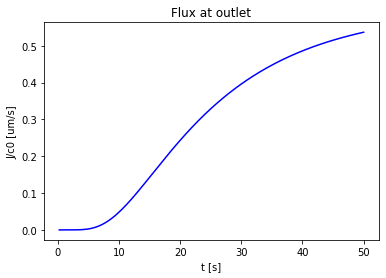

In [61]:
iscale = 200
plt.plot(t_clean[:iscale], D*res_clean[:iscale, -2]/dx, color='blue')
plt.ylabel("J/c0 [um/s]")
plt.xlabel("t [s]")
plt.title("Flux at outlet")
plt.savefig("../tex/figs/flux")

In [62]:
tb = 8
De_clean = 0.5*L**2/(np.pi**2*tb)
De_clean

63.32573977646111

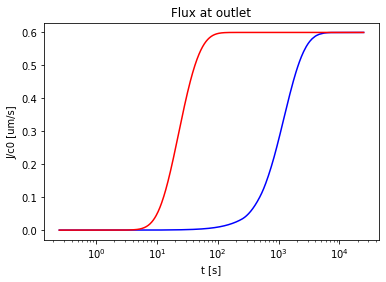

In [21]:
plt.plot(t, D*res[:, -2]/dx, color='blue')
plt.plot(t_clean, D*res_clean[:, -2]/dx, color='red')
plt.ylabel("J/c0 [um/s]")
plt.xlabel("t [s]")
plt.title("Flux at outlet")
plt.semilogx();
plt.savefig("../tex/figs/flux")

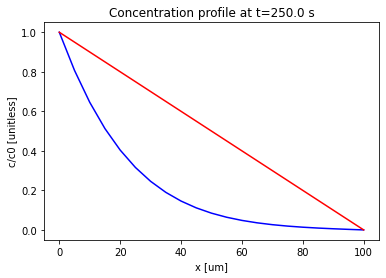

In [28]:
i = 999
plt.plot(x, res[i, :], color='blue')
plt.plot(x_clean, res_clean[i, :], color='red')
plt.xlabel("x [um]")
plt.ylabel("c/c0 [unitless]")
plt.title("Concentration profile at t={0} s".format(i*timestep+timestep))
plt.savefig("../tex/figs/profile%i"%i)